# Atividade de IA: Aprendizado Supervisionado com Breast Cancer Dataset

Aplicando dois algoritmos supervisionados:
- KNN (K-Nearest Neighbors)
- Naive Bayes

Base de diagnóstico de câncer de mama.

In [16]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Carrega a base
dados = load_breast_cancer()
X = dados.data
y = dados.target

# Divide em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

# Normaliza os dados
escalador = StandardScaler()
X_treino_norm = escalador.fit_transform(X_treino)
X_teste_norm = escalador.transform(X_teste)

## Etapa 1: Aplicar KNN com diferentes valores de K

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

resultados_knn = {}

for k in [3, 5, 7]:
    modelo = KNeighborsClassifier(n_neighbors=k)
    modelo.fit(X_treino_norm, y_treino)
    y_pred = modelo.predict(X_teste_norm)

    resultados_knn[k] = {
        "Acurácia": accuracy_score(y_teste, y_pred),
        "Precisão": precision_score(y_teste, y_pred),
        "Sensibilidade": recall_score(y_teste, y_pred)
    }


## Etapa 2: Aplicar Naive Bayes

In [18]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score

modelo_nb = GaussianNB()
modelo_nb.fit(X_treino_norm, y_treino)
y_pred_nb = modelo_nb.predict(X_teste_norm)

resultados_nb = {
    "Acurácia": accuracy_score(y_teste, y_pred_nb),
    "Precisão": precision_score(y_teste, y_pred_nb),
    "Sensibilidade": recall_score(y_teste, y_pred_nb)
}


## Etapa 3: Comparar resultados graficamente

c:\Users\Tiago\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


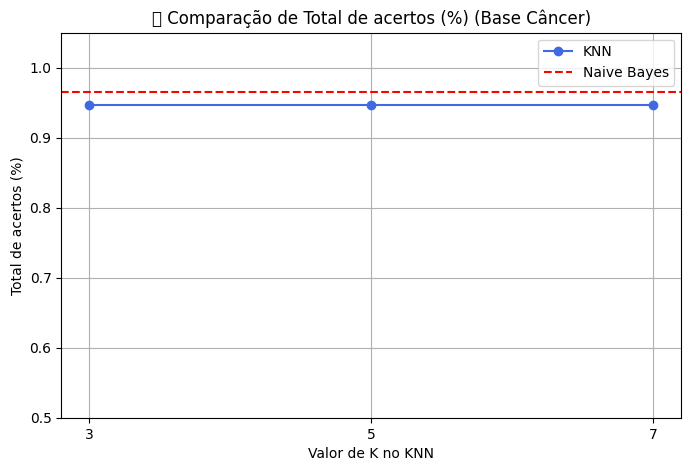

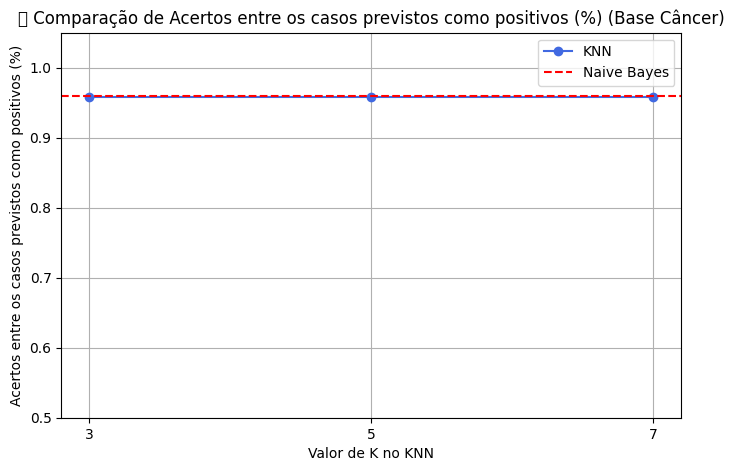

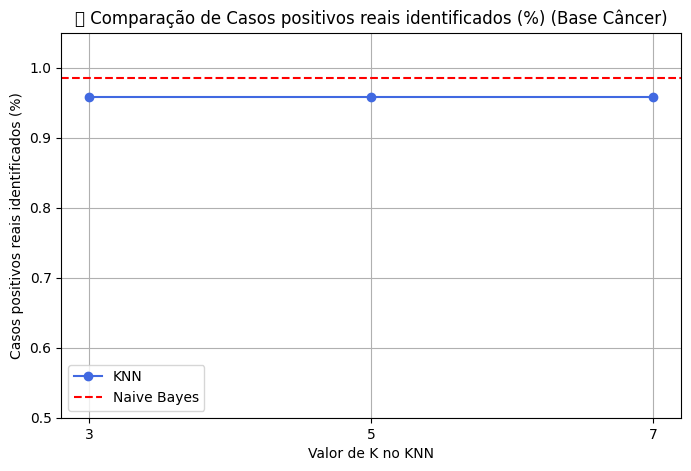

In [19]:
import matplotlib.pyplot as plt

metricas = ["Acurácia", "Precisão", "Sensibilidade"]
k_values = [3, 5, 7]

nomes_explicativos = {
    "Acurácia": "Total de acertos (%)",
    "Precisão": "Acertos entre os casos previstos como positivos (%)",
    "Sensibilidade": "Casos positivos reais identificados (%)"
}

for metrica in metricas:
    valores_knn = [resultados_knn[k][metrica] for k in k_values]
    valor_nb = resultados_nb[metrica]
    
    plt.figure(figsize=(8, 5))
    plt.plot(k_values, valores_knn, marker='o', color='royalblue', label='KNN')
    plt.axhline(y=valor_nb, color='red', linestyle='--', label='Naive Bayes')
    plt.title(f"📊 Comparação de {nomes_explicativos[metrica]} (Base Câncer)")
    plt.xlabel("Valor de K no KNN")
    plt.ylabel(nomes_explicativos[metrica])
    plt.ylim(0.5, 1.05)
    plt.xticks(k_values)
    plt.grid(True)
    plt.legend()
    plt.show()


## Etapa 4: Comparar resultados tabela

Nesta parte, aplicamos os mesmos algoritmos (KNN e Naive Bayes) na base Banknote Authentication.


In [20]:
import pandas as pd

# Cria DataFrame com os resultados do KNN
tabela_knn = pd.DataFrame(resultados_knn).T
tabela_knn.index.name = 'K'
tabela_knn['Modelo'] = 'KNN'

# Cria DataFrame com os resultados do Naive Bayes (repete para alinhar com os K)
tabela_nb = pd.DataFrame([resultados_nb for _ in k_values], index=k_values)
tabela_nb.index.name = 'K'
tabela_nb['Modelo'] = 'Naive Bayes'

# Junta tudo
tabela_comparativa = pd.concat([tabela_knn, tabela_nb])
tabela_comparativa = tabela_comparativa.reset_index()

# Mostra a tabela
tabela_comparativa


,K,Acurácia,Precisão,Sensibilidade,Modelo
0,3,0.947368,0.957746,0.957746,KNN
1,5,0.947368,0.957746,0.957746,KNN
2,7,0.947368,0.957746,0.957746,KNN
3,3,0.964912,0.958904,0.985915,Naive Bayes
4,5,0.964912,0.958904,0.985915,Naive Bayes
5,7,0.964912,0.958904,0.985915,Naive Bayes


## ✅ Conclusão
